<h1 align='center'>FAKE NEWS DETECTION</h1>

<h2>Tfidf Vectorizer:-</h2>
<ul>
<li>This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.
<li><b><u>TF (Term Frequency):-</b></u>  The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.
<li><b><u>IDF (Inverse Document Frequency):-</b></u> Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.
<li>The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.
</ul>

<h3>importing the libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier

<h3>importing the dataset</h3>

In [2]:
df = pd.read_csv("C:\\Users\\mithun\\OneDrive\\Desktop\\Deep Learning and Neural Networks\\projects\\news\\news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
print("The shape/dimension of the dataset: ", df.shape)
print("The columns present in the dataset: ", df.columns)

The shape/dimension of the dataset:  (6335, 4)
The columns present in the dataset:  Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


<h3>Basic EDA</h3>

<h4>Analyzing the labels</h4>

REAL    3171
FAKE    3164
Name: label, dtype: int64


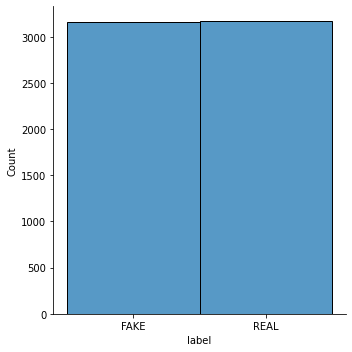

In [16]:
sns.displot(df['label'])
print(df['label'].value_counts())
# x-axis represents the 2 categories of labels - FAKE, REAL

<h3>Getting the labels</h3>

In [17]:
labels = df['label']
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

<h3>Splitting the data into training and testing</h3>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['text'],labels, test_size=0.3,random_state=9)

In [19]:
X_train[:5]

5565    Is The Republican Party On The Verge Of A Hist...
5098    Sen. Rand Paul, R-Ky., announced today that he...
5286    Washington (CNN) Republican Rep. Scott Rigell ...
3022    Assange claims ‘crazed’ Clinton campaign tried...
461     Share This Abdul Barati, a 43-yera-old Afghan ...
Name: text, dtype: object

In [20]:
y_train[:5]

5565    REAL
5098    REAL
5286    REAL
3022    FAKE
461     FAKE
Name: label, dtype: object

<h3>TfidfVectorizer</h3>

In [24]:
tfidf_vector = TfidfVectorizer(stop_words='english',max_df=0.7)    # intializing the TfidfVectorizer with stop words from English language and maximum document frequency of 0.7
# which means terms with higher document freuqncy (> 0.7) are discarded

In [25]:
# Fit and transform the vectorizer on train data and transform the vectorizer on test data
tfidf_train = tfidf_vector.fit_transform(X_train) 
tfidf_test = tfidf_vector.transform(X_test)

<h3>Model Builiding</h3>

In [27]:
model = PassiveAggressiveClassifier(max_iter = 50)   # intializing the model
model.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

<h3>Predicition on Test data</h3>

In [30]:
pred = model.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("Accuracy score: ", score)

Accuracy score:  0.932140978432404


* we got 93.21% accuracy

<h3>Classification Report</h3>

In [33]:
print("Classification report: ")
print(classification_report(y_test, pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred))

Classification report: 
              precision    recall  f1-score   support

        FAKE       0.92      0.95      0.93       943
        REAL       0.95      0.91      0.93       958

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901

Confusion matrix: 
[[897  46]
 [ 83 875]]


* we got 897 True positive, 875 True negative, 46 False positive, 83 False negative values